<a href="https://colab.research.google.com/github/chernandezrojas1991/exercises-u3-dl/blob/main/metricas_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
wine = pd.read_csv('https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [4]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

# Inercia

La “rigidez” es una medida de la similitud de los datos en un clúster determinado con los demás puntos de datos en el mismo clúster. Una forma de evaluar la rigidez de los clústeres es utilizar un gráfico de inercia (inertia) para diferentes números de clústeres (valores k). La inercia de un clúster se determina calculando la distancia entre cada punto y el centroide de su clúster, elevando al cuadrado esas distancias y sumando los cuadrados. Esto determina la “rigidez” de cada clúster.

Si bien es deseable que los clústeres sean rígidos (baja inercia), la inercia más baja no es el mejor agrupamiento. Para comprender por qué, consideren que la inercia siempre bajará si agregamos más clústeres. Entre más clústeres haya, menor será la puntuación de inercia.

**Método del codo**

El codo es el lugar donde la reducción drástica en la inercia comienza a nivelarse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

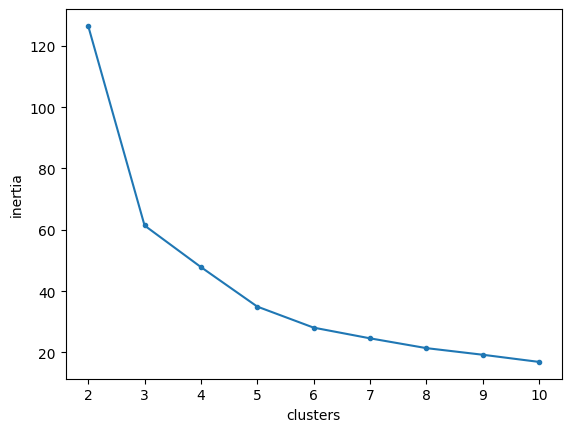

In [5]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

En el gráfico anterior, vemos que el gráfico comienza a nivelarse en 3 clústeres. Esto se parece a la curva de un brazo, por lo que se llama "codo". Por lo tanto, el 3 sería un candidato para un buen número de clústeres.

# Silhouette Score para K-medias

La puntuación de silueta es una medida que considera: la rigidez y la separación de cada clúster. Lo hace calculando la distancia entre cada dato y todos los otros datos en ese mismo clúster y calculando la distancia entre cada punto de datos y los puntos en el clúster más cercano. **La mejor puntuación es 1** (señalización de clústeres bien definidos y separados) y **la peor es -1**.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

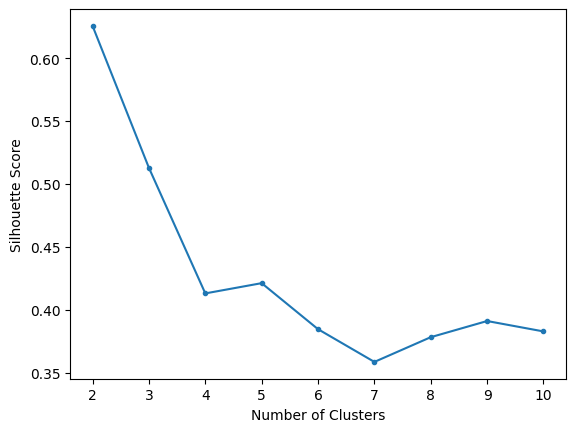

In [6]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

 Podemos ver del trazado anterior que 2 sería el mejor número de clústeres para nuestros datos debido a que tiene la puntuación de silueta más alta.

In [7]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6256358724826118

 Visualicemos los clústeres 2 y 3 para ver si podemos determinar el mejor clúster visualmente.

In [8]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

<ipython-input-9-de3749e883b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster2'] = kmeans2.labels_
<ipython-input-9-de3749e883b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster3'] = kmeans3.labels_


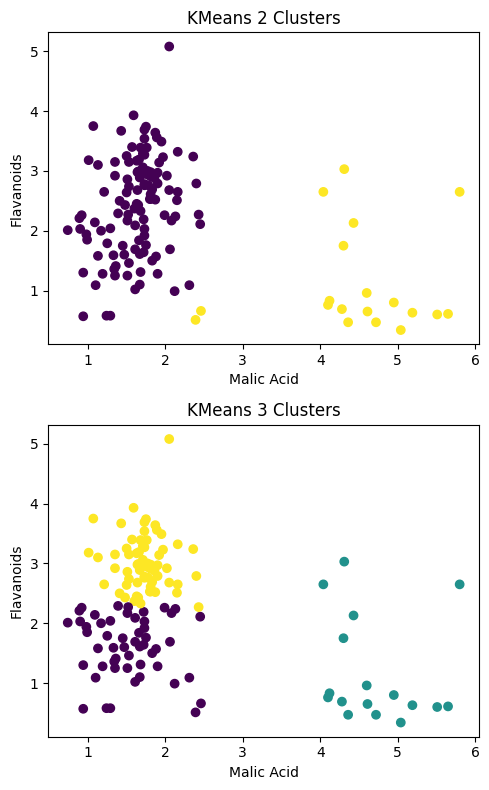

In [9]:
# Save the cluster labels to the dataframe
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster2'])
axes[0].set_xlabel('Malic Acid')
axes[0].set_ylabel('Flavanoids')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster3'])
axes[1].set_xlabel('Malic Acid')
axes[1].set_ylabel('Flavanoids')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();